In [1]:
!pip install expertai-nlapi

     |████████████████████████████████| 102kB 4.0MB/s 


In [2]:
def expertai_api_setup():
    client = ExpertAiClient()
    os.environ["EAI_USERNAME"] = 'foo'
    os.environ["EAI_PASSWORD"] = 'moo'
    return client

In [3]:
def sentiment_analyzer(client, text, language= 'en'):
    output = client.full_analysis(body={"document": {"text": text}}, params={'language': language} )

    output = client.specific_resource_analysis(
        body={ "document" : {"text": text}},
        params={'language': language, 'resource': 'sentiment'}
    )
    return output.sentiment.overall

In [4]:
import pandas as pd
import numpy as np
from expertai.nlapi.cloud.client import ExpertAiClient

In [26]:
df_tesla = pd.read_csv('utc tesla.csv', header=None)
df_tesla.columns = ['created_at', 'id', 'text', 'clean', 'clean_len']

In [30]:
df_tesla

,created_at,id,text,clean,clean_len
0,2021-06-15T12:39:05.000Z,1.400000e+18,RT @BusinessInsider: Elon Musk's mother Maye i...,Elon Musk's mother Maye is a supermodel who b...,120
1,2021-06-15T13:36:58.000Z,1.400000e+18,RT @latokens: Earn 415 million STSL crypto tok...,Earn 415 million STSL crypto tokens in Short ...,112
2,2021-06-15T13:37:00.000Z,1.400000e+18,RT @nytimesbusiness: Elon Musk proved once mor...,Elon Musk proved once more that he can shift ...,223
3,2021-06-15T13:37:01.000Z,1.400000e+18,$KULR Taglich Brothers new Research Report\nht...,$KULR Taglich Brothers new Research Report\n \...,246
4,2021-06-15T13:37:02.000Z,1.400000e+18,NEWS: Tesla Granted U.S. Patent Titled 'Advanc...,NEWS: Tesla Granted U.S. Patent Titled 'Advanc...,103
...,...,...,...,...,...
690,2021-06-15T19:39:03.000Z,1.400000e+18,@Josue83289056 @tesla_raj @elonmusk Yeah ik. J...,Yeah ik. Just saying that I don't like this t...,58
691,2021-06-15T19:39:04.000Z,1.400000e+18,RT @WholeMarsBlog: A hardcore smackdown to pol...,A hardcore smackdown to polluting cars. \n\nT...,81
692,2021-06-15T19:39:04.000Z,1.400000e+18,RT @Meganthetrainor: is this like when Azealia...,is this like when Azealia went to Elon Musk h...,52
693,2021-06-15T19:39:04.000Z,1.400000e+18,RT @sof1azara03: $50 Giveaway || 6hrs\n\nRT + ...,$50 Giveaway || 6hrs\n\nRT + Join and reply t...,100


In [31]:
!pip install yfinance -q

     |████████████████████████████████| 6.3MB 8.1MB/s 


In [32]:
import yfinance as yf

In [33]:
df_tesla['created_at'] = pd.to_datetime(df_tesla['created_at'])

In [40]:
tsla = yf.Ticker("TSLA")
tsla_stock = tsla.history(
    start= min(df_tesla['created_at']),
    end= max(df_tesla['created_at']),
    interval = '1m',
).reset_index()

In [41]:
tsla_stock

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-06-15 09:30:00-04:00,616.690002,616.789978,614.520020,614.520020,375496,0,0
1,2021-06-15 09:31:00-04:00,614.549988,614.619995,612.580017,613.679993,138561,0,0
2,2021-06-15 09:32:00-04:00,613.486023,613.690002,612.359985,612.390015,96786,0,0
3,2021-06-15 09:33:00-04:00,612.299988,612.530029,612.130005,612.429993,93922,0,0
4,2021-06-15 09:34:00-04:00,612.000000,613.419983,611.989990,613.315002,100818,0,0
...,...,...,...,...,...,...,...,...
385,2021-06-15 15:55:00-04:00,599.275024,600.099976,599.159973,599.330017,91515,0,0
386,2021-06-15 15:56:00-04:00,599.320007,599.669983,598.969971,599.030029,58569,0,0
387,2021-06-15 15:57:00-04:00,599.030029,599.369995,598.880127,598.955017,67557,0,0
388,2021-06-15 15:58:00-04:00,598.909973,599.169983,598.809998,599.090027,67555,0,0


In [20]:
from tqdm.notebook import tqdm
import os

In [42]:
client = expertai_api_setup()
l = []
sentiments = []
for text in tqdm(df_tesla['clean']):
    if len(text) > 1:
        sentiments.append(sentiment_analyzer(client, text))
    else:
        sentiments.append(0)
    l.append(text)

In [47]:
df_exp = pd.DataFrame([sentiments, df_tesla['created_at'][:len(sentiments)]])

In [49]:
df_exp_transpose = df_exp.T
df_exp_transpose.columns = ['sentiment', 'created_at']
df_exp_transpose['created_at'] = pd.to_datetime(df_exp_transpose['created_at'])

In [52]:
df_exp_transpose

,sentiment,created_at
0,0,2021-06-15 12:39:05+00:00
1,0,2021-06-15 13:36:58+00:00
2,-26,2021-06-15 13:37:00+00:00
3,0,2021-06-15 13:37:01+00:00
4,0,2021-06-15 13:37:02+00:00
...,...,...
690,5.4,2021-06-15 19:39:03+00:00
691,1.79,2021-06-15 19:39:04+00:00
692,0,2021-06-15 19:39:04+00:00
693,-10.3,2021-06-15 19:39:04+00:00


In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (10,10)

In [51]:
mean_ = np.mean(tsla_stock['Open'])

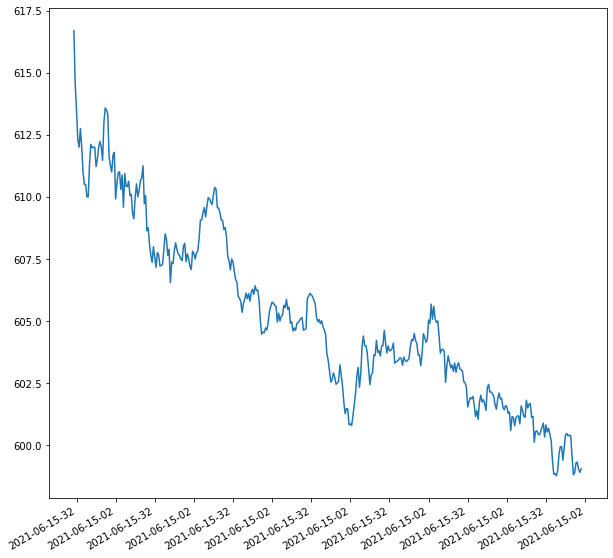

In [60]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d-%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.plot(tsla_stock['Datetime'], tsla_stock['Open'] )
plt.gcf().autofmt_xdate()

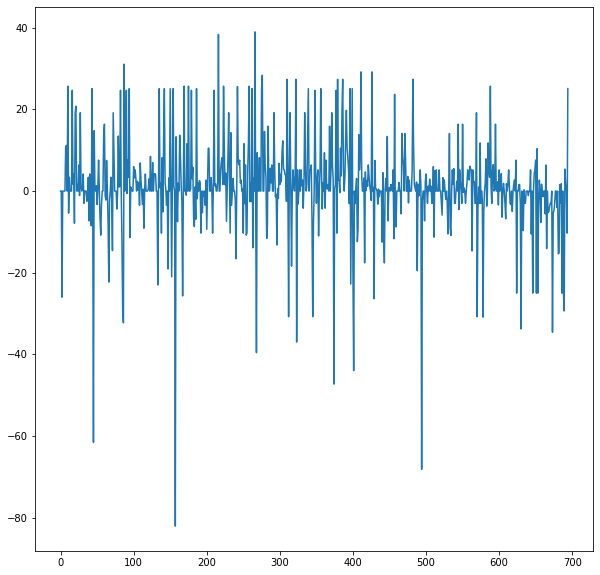

In [57]:
plt.plot(sentiments)